ADF Statistic: -1.2734
p-value: 0.6413
Mean Absolute Error (MAE): 6.6307


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarnin

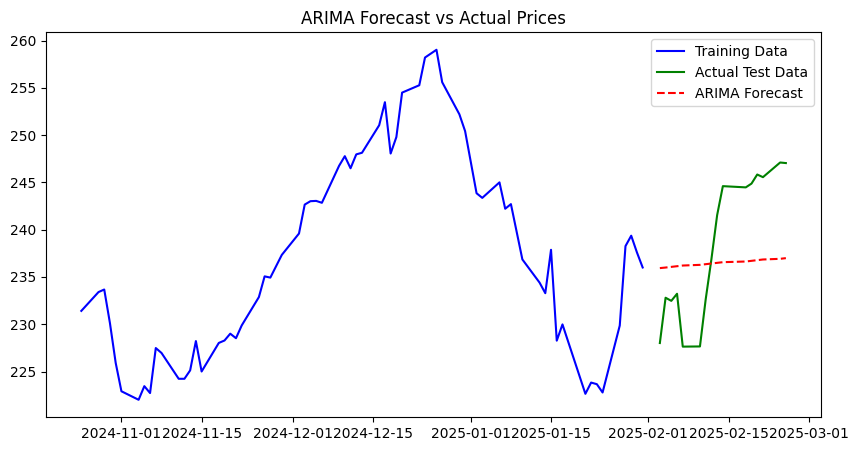

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Load dataset
file_path = "aapl_4mo_sorted.csv"  # Replace with actual file path
df = pd.read_csv(file_path, index_col="Date", parse_dates=True)

# Use 'Close' prices for ARIMA
stock_series = df['Close']

# Split into train (first 66 days) and test (last 16 days)
train, test = stock_series[:66], stock_series[66:]

# Step 1: Check for stationarity using ADF test
adf_test = adfuller(train)
print(f"ADF Statistic: {adf_test[0]:.4f}")
print(f"p-value: {adf_test[1]:.4f}")

# Step 2: Differencing if needed (d-value selection)
if adf_test[1] > 0.05:
    train_diff = train.diff().dropna()  # First-order differencing
else:
    train_diff = train

# Step 3: Define ARIMA order (p, d, q) manually
arima_order = (1, 2, 1)  # Adjust after ACF/PACF analysis

# Step 4: Fit ARIMA model
model = ARIMA(train, order=arima_order)
model_fit = model.fit()

# Step 5: Forecast next 4 days
forecast = model_fit.forecast(steps=16)

# Step 6: Evaluate model performance
mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Step 7: Plot results
plt.figure(figsize=(10, 5))
plt.plot(train, label="Training Data", color="blue")
plt.plot(test, label="Actual Test Data", color="green")
plt.plot(test.index, forecast, label="ARIMA Forecast", linestyle="dashed", color="red")
plt.legend()
plt.title("ARIMA Forecast vs Actual Prices")
plt.show()

In [2]:
# updates p-value for us.
from statsmodels.tsa.stattools import adfuller

train_diff2 = train.diff().diff().dropna()  # Second differencing
adf_test = adfuller(train_diff2)
print(f"New ADF p-value: {adf_test[1]:.4f}")  # Should be ≤ 0.05


New ADF p-value: 0.0257


<Figure size 600x400 with 0 Axes>

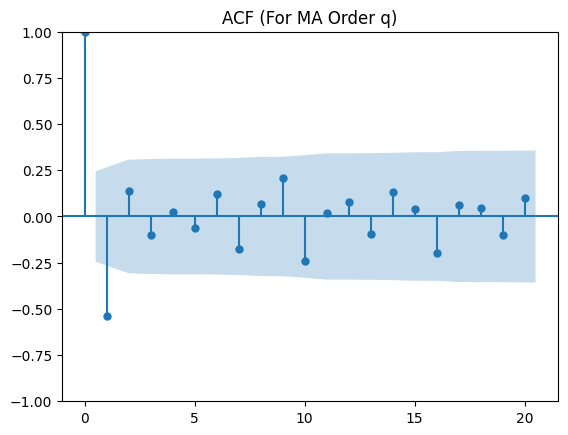

In [3]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(6,4))
plot_acf(train.diff().diff().dropna(), lags=20)
plt.title("ACF (For MA Order q)")
plt.show()


<Figure size 600x400 with 0 Axes>

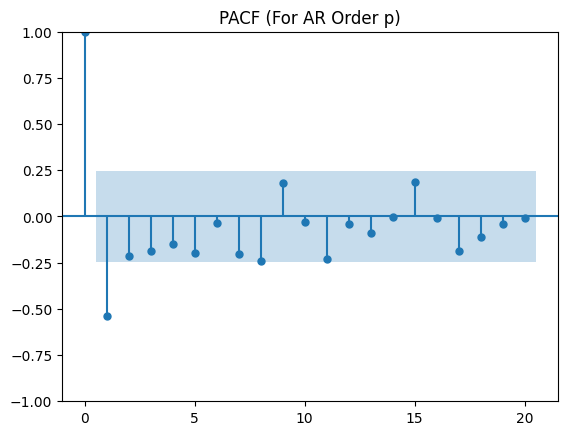

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(6,4))
plot_pacf(train.diff().diff().dropna(), lags=20)
plt.title("PACF (For AR Order p)")
plt.show()


# What we really need is auto_arima so p, d and q are found via grid search.  Stay tuned!!